# Explore-Weather-Treads 

## Project 1

## Overview
In this project I have analysed local and global temperature data and compare the temperature trends where I live to overall global temperature trends.


## Tools Used
    1.SQL- For Data Extraction
    2.Python-For Moving Average Calculation and Visualization

## Extracting Data

Following SQL query was executed to retrieve data mention below:

SELECT * 
FROM city_list 
WHERE city LIKE 'Pu%' AND country LIKE 'Ind%';

SELECT * 
From city_data
WHERE city Like 'Pu%' AND country LIKE 'Ind%';

SELECT *
FROM global_data;
    
    
    
    1.Local Dataset-Pune(India)
    2.Global Dataset
    

## Importing libaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Global Data

In [2]:
global_df=pd.read_csv("global.csv",parse_dates=['year'],index_col='year')
global_df.head(2)

,avg_temp
year,
1750-01-01,8.72
1751-01-01,7.98


In [3]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Data columns (total 1 columns):
avg_temp    266 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB


## Reading Local Data 
Extracted data for Pune City (India)

In [4]:
local_df=pd.read_csv("local.csv", parse_dates=['year'],index_col='year')
local_df.head(2)

,city,country,avg_temp
year,,,
1796-01-01,Pune,India,24.39
1797-01-01,Pune,India,25.17


In [5]:
local_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 1796-01-01 to 2013-01-01
Data columns (total 3 columns):
city        218 non-null object
country     218 non-null object
avg_temp    211 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.8+ KB


In [6]:
print(global_df.shape,local_df.shape)

(266, 1) (218, 3)


### Rows for global and local data are mismatching this my be due to some years not recorded for local data.

## Calculation:
### Moving Average For 5 Years

pandas.rolling function was used to calculate moving average

In [7]:
global_df['mavg_temp_5']=global_df['avg_temp'].rolling(window=5,min_periods=1).mean().shift(1)
local_df['mavg_temp_5']=local_df['avg_temp'].rolling(window=5,min_periods=1).mean().shift(1)

### Moving Average For 10 Years

In [8]:
global_df['mavg_temp_10']=global_df['avg_temp'].rolling(window=10,min_periods=1).mean().shift(1)
local_df['mavg_temp_10']=local_df['avg_temp'].rolling(window=10,min_periods=1).mean().shift(1)

## Data Visualization
### Plot for Moving Average of 5 Years

#### For global

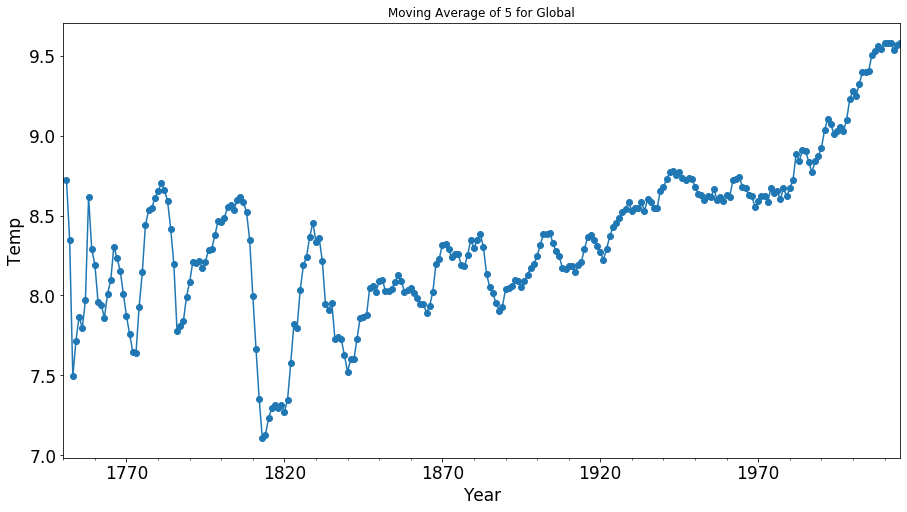

In [9]:
global_df['mavg_temp_5'].plot(figsize=(15,8), title= 'Moving Average of 5 for Global', fontsize=17, marker='o');
plt.xlabel("Year",fontsize=17)
plt.ylabel("Temp",fontsize=17);

#### For Local

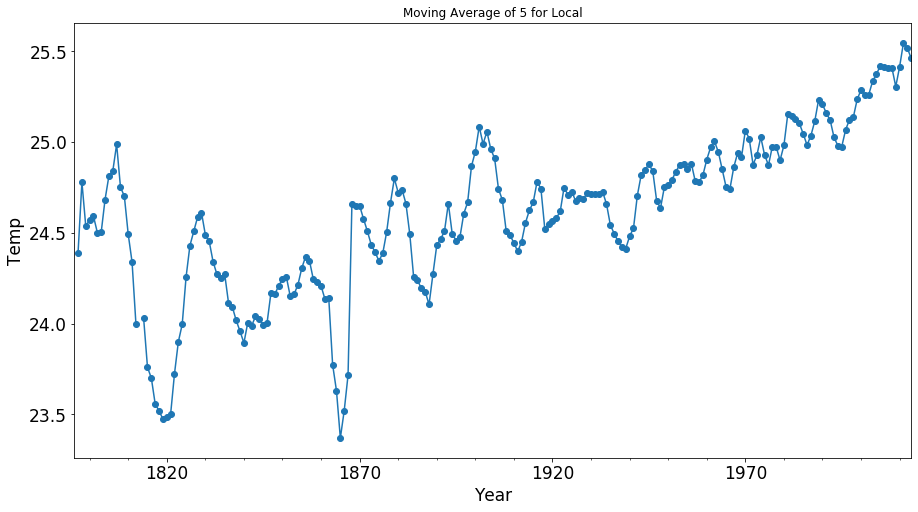

In [10]:
local_df['mavg_temp_5'].plot(figsize=(15,8), title= 'Moving Average of 5 for Local', fontsize=17, marker='o');
plt.xlabel("Year",fontsize=17)
plt.ylabel("Temp",fontsize=17);

### Trends for Temperture for both local and globally is increasing since as years are increasing with few vairations

## Plot for Comparsion for Local and Global (Moving average of 5 years)

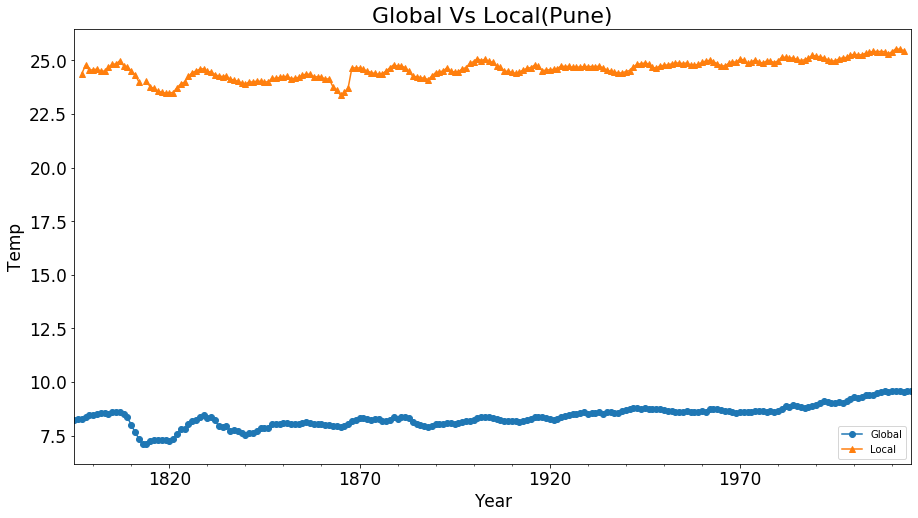

In [11]:
global_df['mavg_temp_5'].plot(figsize=(15,8), fontsize=17, label='Global',marker="o")
local_df['mavg_temp_5'].plot(figsize=(15,8), fontsize=17, label='Local',marker="^")
plt.title("Global Vs Local(Pune)",fontsize=22)
plt.xlim(pd.Timestamp('1795-01-01'),pd.Timestamp('2015-01-01'))
plt.xlabel("Year",fontsize=17) 
plt.ylabel("Temp",fontsize=17) 
plt.legend() 
plt.show()

## Plot for Comparsion for Local and Global (Moving average of 10 years)

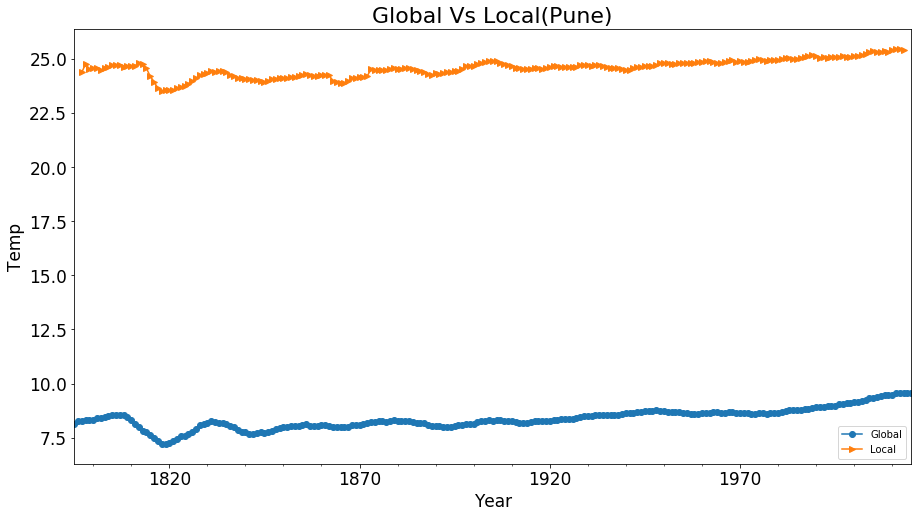

In [12]:
global_df['mavg_temp_10'].plot(figsize=(15,8), fontsize=17, label='Global',marker="o")
local_df['mavg_temp_10'].plot(figsize=(15,8), fontsize=17, label='Local',marker=">")
plt.title("Global Vs Local(Pune)",fontsize=22)
plt.xlim(pd.Timestamp('1795-01-01'),pd.Timestamp('2015-01-01'))
plt.xlabel("Year",fontsize=17) 
plt.ylabel("Temp",fontsize=17) 
plt.legend() 
plt.show()

## Correlation Calculation

In [13]:
global_df['mavg_temp_5'].corr(local_df['mavg_temp_5'])

0.9037814521113138

In [14]:
global_df['mavg_temp_10'].corr(local_df['mavg_temp_10'])

0.9215323554623952

## Difference in Temperature

In [15]:
np.sum(local_df['mavg_temp_5'].mean()-global_df['mavg_temp_5'].mean())

16.24954001863501

In [16]:
np.sum(local_df['mavg_temp_10'].mean()-global_df['mavg_temp_10'].mean())

16.256369474221017

## Observations:

    1. Global and Local temperatures seems to rising (increase in trend) as years are passing (over a decades), 
    2. Strong correlation can be seen between rise in temperature globally as well as locally.
    3. Global average temperatures are 17 times much cooler than local average temperatures.
    4. Based on correlation values average local temperature can be estimated by average global temperature.